In [78]:
# import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [79]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv')
data.tail()


,anchor_ratio,trans_range,node_density,iterations,ale,sd_ale
102,18,23,100,20,1.287472,0.375227
103,14,17,200,60,0.899102,0.231822
104,15,20,100,50,1.171140,0.372001
105,20,20,100,40,1.234493,0.599834
106,15,15,200,40,0.635426,0.139791


<Axes: >

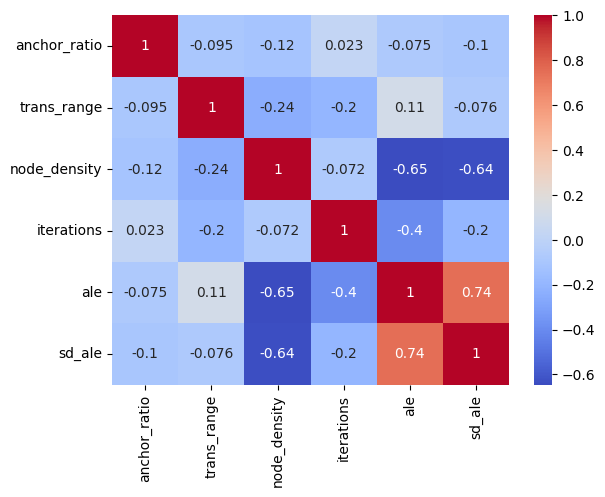

In [80]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=True, cmap='coolwarm')

**if you need to transfer the data to numerical use **

`pd.get_dummies(DataFrame, columns = [column_1, column_2, column_3, column_)`

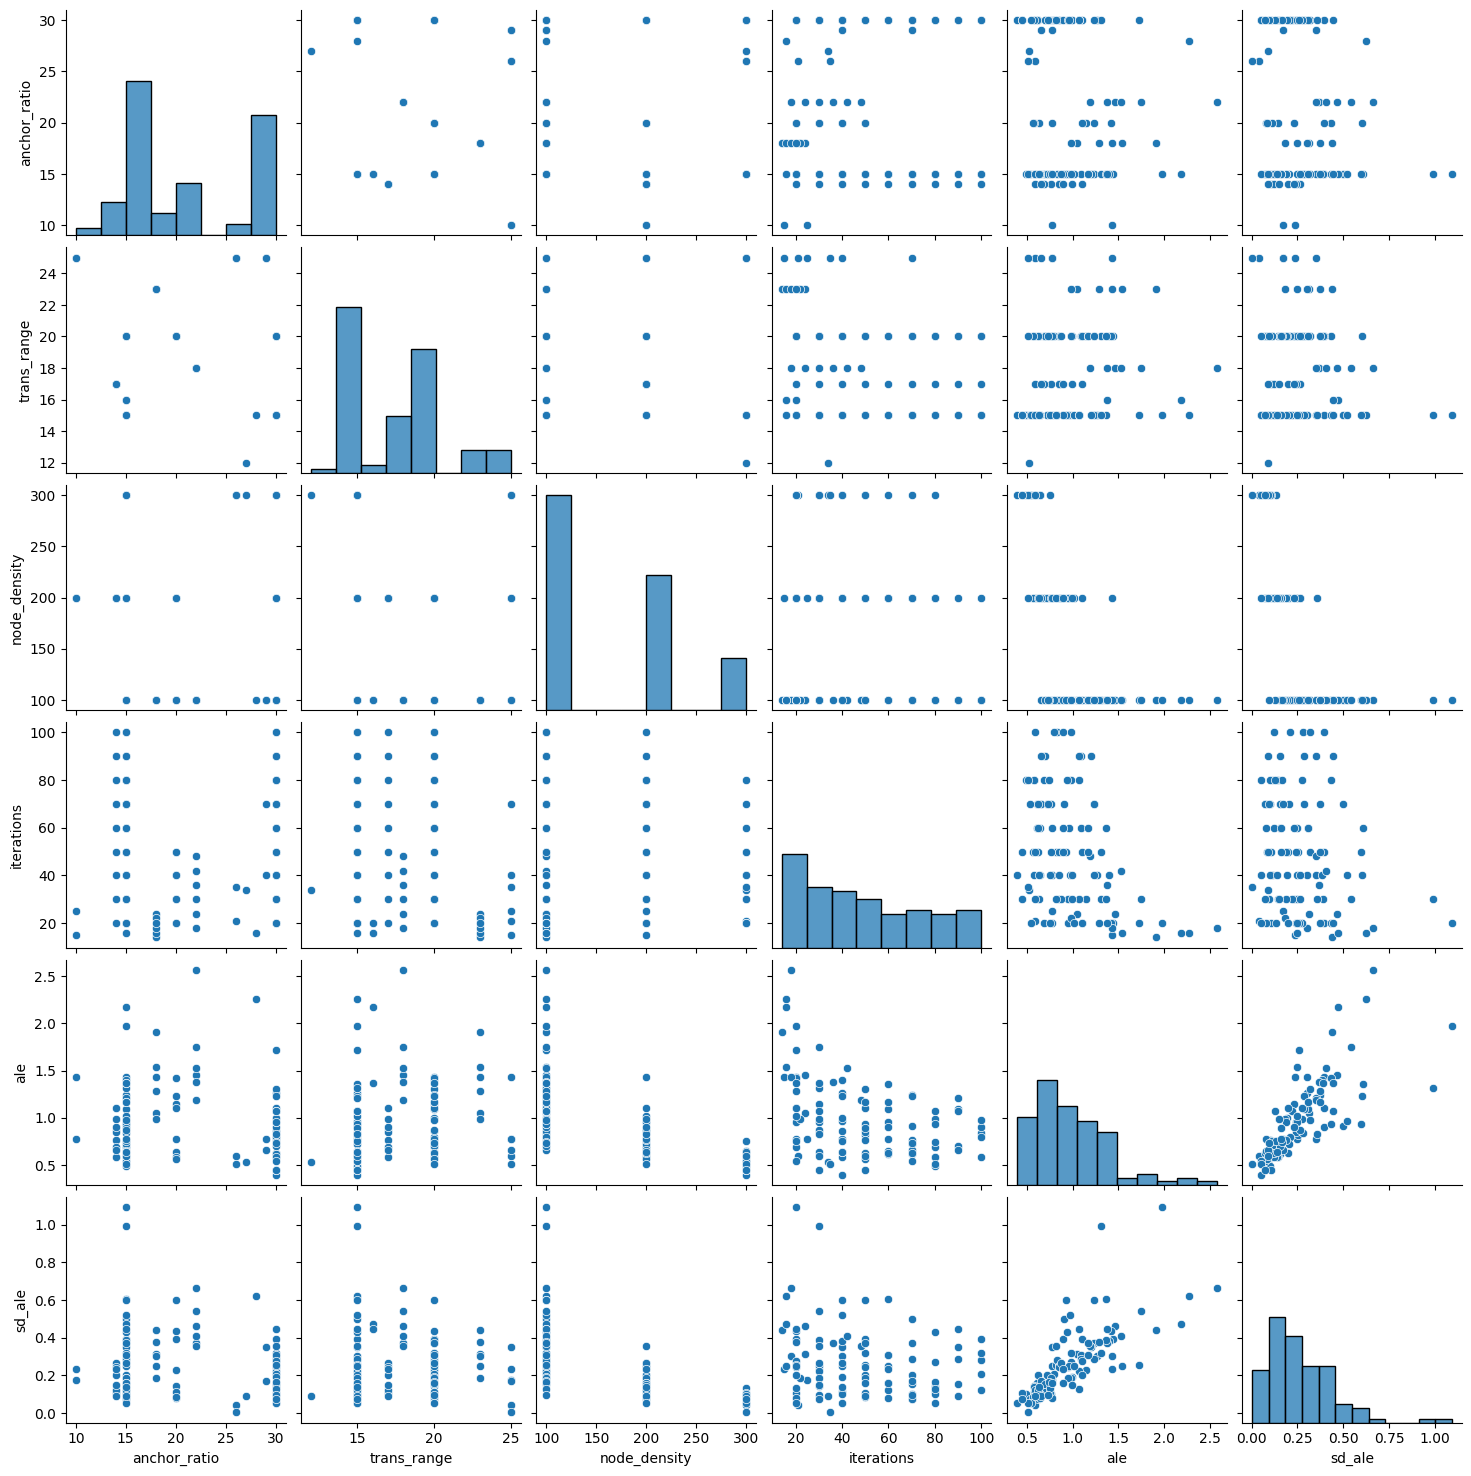

In [81]:
sns.pairplot(data)

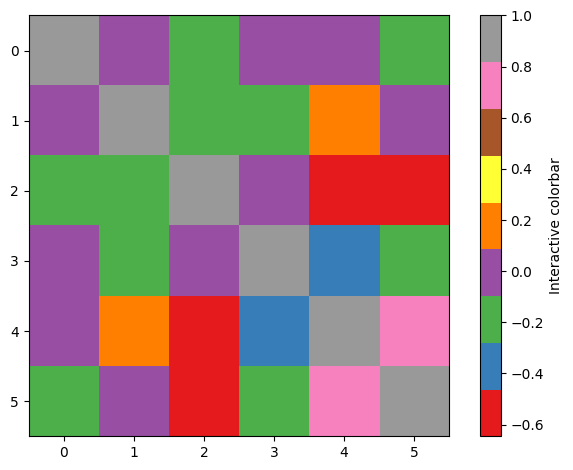

In [82]:
fig, ax = plt.subplots()
im = ax.imshow(data_corr, cmap='Set1', interpolation='none')
fig.colorbar(im, ax=ax, label='Interactive colorbar')
fig.tight_layout()
plt.show()

In [83]:
X = data.iloc[:,0:-1]
Y = data['sd_ale']

In [84]:
# split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

In [85]:
# train a linear regression model
my_model = linear_model.LinearRegression()
my_model.fit(X_train, Y_train)
my_model.intercept_
my_model.coef_

array([-0.00390158, -0.01612939, -0.00106691, -0.00027872,  0.205388  ])

In [86]:
# check model error
mae_train = mean_absolute_error(Y_train, my_model.predict(X_train))
print('train Set: %.2f'% mae_train)

mae_test = mean_absolute_error(Y_test, my_model.predict(X_test))
print('test Set: %.2f'% mae_test)


train Set: 0.07
test Set: 0.07


In [87]:
# X_test.iterations
# Y_test.shape
X_line = np.linspace(X_test['ale'].min(), X_test['ale'].max(), 100)
X_line_df = pd.DataFrame(columns=X_train.columns)
X_line_df['ale'] = X_line
Y_line = my_model.predict(X_line_df)

plt.scatter(X_test['ale'], Y_test, color="black")
plt.plot(X_line, Y_line, color="blue", linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()




ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# predict new values
new_values = pd.DataFrame(np.array([55]).reshape(1,-1), columns=X.columns)

new_values = my_model.predict(new_values)
new_values.round(2)

AttributeError: 'Series' object has no attribute 'columns'

train Set: 0.07
test Set: 0.08


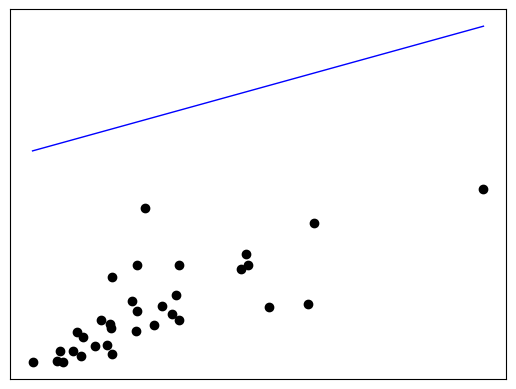

In [ ]:
data = pd.read_csv('mcs_ds_edited_iter_shuffled.csv')

X = data.iloc[:,0:-1]
Y = data['sd_ale']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

# train a linear regression model
my_model = linear_model.LinearRegression()
my_model.fit(X_train, Y_train)

mae_train = mean_absolute_error(Y_train, my_model.predict(X_train))
print('train Set: %.2f'% mae_train)

mae_test = mean_absolute_error(Y_test, my_model.predict(X_test))
print('test Set: %.2f'% mae_test)

# plot the results
X_line = np.linspace(X_test['ale'].min(), X_test['ale'].max(), 100)
X_line_df = pd.DataFrame(columns=X_train.columns)
X_line_df['ale'] = X_line
X_line_df['anchor_ratio'] = 1  # set some value for anchor_ratio
X_line_df['trans_range'] = 1  # set some value for trans_range
X_line_df['node_density'] = 1  # set some value for node_density
X_line_df['iterations'] = 1  # set some value for iterations
Y_line = my_model.predict(X_line_df)

plt.scatter(X_test['ale'], Y_test, color="black")
plt.plot(X_line, Y_line, color="blue", linewidth=1)
plt.xticks(())
plt.yticks(())
plt.show()



Mean Squared Error: 0.032688939190858746


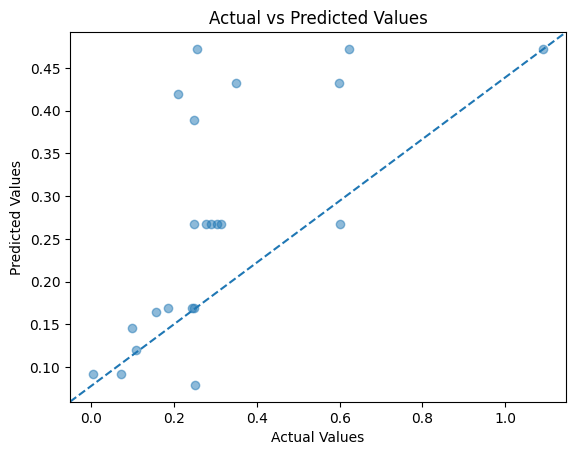

In [93]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y = data['sd_ale']
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# predict on test data and calculate the mean squared error
y = data['sd_ale']
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

import matplotlib.pyplot as plt

# predict values for test set
y_pred = model.predict(X_test)

# plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
